In [44]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

import keras
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
img_width = 150
img_height = 150

train_path = 'C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/dogcat/train'
validation_path = 'C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/dogcat/validate'
test_path = 'C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/dogcat/test'

train_sample = 120
validation_sample = 30 

epoch = 20
batch_size = 20

In [30]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [31]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [33]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.0001), metrics = ['accuracy'])

In [34]:
train_datagen = ImageDataGenerator(rescale = 1. /  255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [35]:
test_datagen = ImageDataGenerator(rescale = 1. /  255)

In [36]:
train_generator = train_datagen.flow_from_directory(train_path, target_size = (img_width, img_height),
                                                   batch_size = batch_size, class_mode = 'binary')

Found 16100 images belonging to 2 classes.


In [37]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [38]:
validation_generator = test_datagen.flow_from_directory(validation_path, target_size = (img_width, img_height),
                                                   batch_size = batch_size, class_mode = 'binary')

Found 4600 images belonging to 2 classes.


In [39]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = train_sample, epochs = epoch,
                             validation_data = validation_generator,
                             validation_steps = validation_sample)

Epoch 1/20
120/120 [==============================] - 176s 1s/step - loss: 0.6920 - accuracy: 0.5229 - val_loss: 0.6836 - val_accuracy: 0.6267
Epoch 2/20
120/120 [==============================] - 136s 1s/step - loss: 0.6845 - accuracy: 0.5675 - val_loss: 0.6662 - val_accuracy: 0.5350
Epoch 3/20
120/120 [==============================] - 127s 1s/step - loss: 0.6701 - accuracy: 0.5908 - val_loss: 0.6493 - val_accuracy: 0.6833
Epoch 4/20
120/120 [==============================] - 213s 2s/step - loss: 0.6486 - accuracy: 0.6212 - val_loss: 0.6034 - val_accuracy: 0.7167
Epoch 5/20
120/120 [==============================] - 188s 2s/step - loss: 0.6280 - accuracy: 0.6654 - val_loss: 0.5737 - val_accuracy: 0.7283
Epoch 6/20
120/120 [==============================] - 134s 1s/step - loss: 0.5996 - accuracy: 0.6692 - val_loss: 0.5542 - val_accuracy: 0.7267
Epoch 7/20
120/120 [==============================] - 117s 974ms/step - loss: 0.5838 - accuracy: 0.7029 - val_loss: 0.5517 - val_accuracy: 0.7

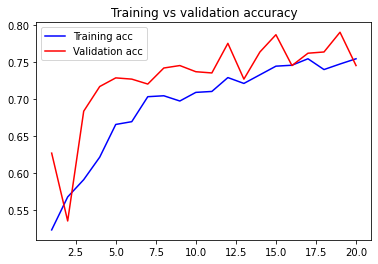

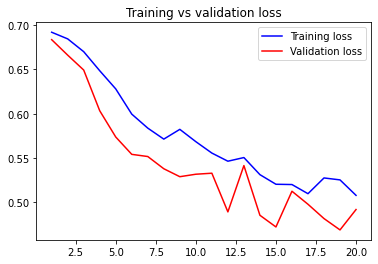

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training vs validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training vs validation loss')
plt.legend()
plt.show()

In [49]:
pred_path = 'C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/dogcat/test/'
onlyfiles = [f for f in listdir(pred_path) if isfile(join(pred_path, f))]
print(onlyfiles)

['3598.jpg', '3599.jpg', '3600.jpg', '3601.jpg', '3602.jpg', '3603.jpg', '3604.jpg', '3605.jpg', '3606.jpg', '3607.jpg', '3608.jpg', '3609.jpg', '3610.jpg', '3611.jpg', '3612.jpg', '3613.jpg', '3614.jpg', '3615.jpg', '3616.jpg', '3617.jpg', '3618.jpg', '3619.jpg', '3620.jpg', '3621.jpg', '3622.jpg', '3623.jpg', '3624.jpg', '3625.jpg', '3626.jpg', '3627.jpg', '3628.jpg', '3629.jpg', '3630.jpg', '3631.jpg', '3632.jpg', '3633.jpg', '3634.jpg', '3635.jpg', '3636.jpg', '3637.jpg', '3638.jpg', '3639.jpg', '3640.jpg', '3641.jpg', '3642.jpg', '3643.jpg', '3644.jpg', '3645.jpg', '3646.jpg', '3647.jpg', '3648.jpg', '3649.jpg', '3650.jpg', '3651.jpg', '3652.jpg', '3653.jpg', '3654.jpg', '3655.jpg', '3656.jpg', '3657.jpg', '3658.jpg', '3659.jpg', '3660.jpg', '3661.jpg', '3662.jpg', '3663.jpg', '3664.jpg', '3665.jpg', '3666.jpg', '3667.jpg', '3668.jpg', '3669.jpg', '3670.jpg', '3671.jpg', '3672.jpg', '3673.jpg', '3674.jpg', '3675.jpg', '3676.jpg', '3677.jpg', '3678.jpg', '3679.jpg', '3680.jpg', '36

In [51]:
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(pred_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
3598.jpg: dog
3599.jpg: dog
3600.jpg: cat
3601.jpg: dog
3602.jpg: dog
3603.jpg: cat
3604.jpg: cat
3605.jpg: cat
3606.jpg: dog
3607.jpg: dog
3608.jpg: dog
3609.jpg: cat
3610.jpg: dog
3611.jpg: dog
3612.jpg: dog
3613.jpg: dog
3614.jpg: cat
3615.jpg: dog
3616.jpg: dog
3617.jpg: cat
3618.jpg: cat
3619.jpg: dog
3620.jpg: dog
3621.jpg: dog
3622.jpg: dog
3623.jpg: dog
3624.jpg: cat
3625.jpg: dog
3626.jpg: cat
3627.jpg: dog
3628.jpg: dog
3629.jpg: dog
3630.jpg: dog
3631.jpg: dog
3632.jpg: dog
3633.jpg: dog
3634.jpg: dog
3635.jpg: cat
3636.jpg: dog
3637.jpg: dog
3638.jpg: cat
3639.jpg: cat
3640.jpg: dog
3641.jpg: dog
3642.jpg: dog
3643.jpg: dog
3644.jpg: cat
3645.jpg

4147.jpg: cat
4148.jpg: dog
4149.jpg: cat
4150.jpg: cat
4151.jpg: dog
4152.jpg: dog
4153.jpg: dog
4154.jpg: cat
4155.jpg: dog
4156.jpg: cat
4157.jpg: cat
4158.jpg: dog
4159.jpg: cat
4160.jpg: cat
4161.jpg: dog
4162.jpg: dog
4163.jpg: cat
4164.jpg: dog
4165.jpg: dog
4166.jpg: dog
4167.jpg: dog
4168.jpg: dog
4169.jpg: cat
4170.jpg: dog
4171.jpg: dog
4172.jpg: dog
4173.jpg: dog
4174.jpg: dog
4175.jpg: dog
4176.jpg: dog
4177.jpg: dog
4178.jpg: dog
4179.jpg: dog
4180.jpg: dog
4181.jpg: cat
4182.jpg: dog
4183.jpg: cat
4184.jpg: dog
4185.jpg: cat
4186.jpg: dog
4187.jpg: dog
4188.jpg: dog
4189.jpg: cat
4190.jpg: dog
4191.jpg: dog
4192.jpg: dog
4193.jpg: dog
4194.jpg: dog
4195.jpg: dog
4196.jpg: dog
4197.jpg: dog
4198.jpg: dog
4199.jpg: dog
4200.jpg: cat
4201.jpg: cat
4202.jpg: dog
4203.jpg: dog
4204.jpg: cat
4205.jpg: cat
4206.jpg: dog
4207.jpg: cat
4208.jpg: dog
4209.jpg: dog
4210.jpg: dog
4211.jpg: dog
4212.jpg: cat
4213.jpg: cat
4214.jpg: dog
4215.jpg: dog
4216.jpg: dog
4217.jpg: dog
4218.j

4734.jpg: cat
4735.jpg: cat
4736.jpg: cat
4737.jpg: dog
4738.jpg: cat
4739.jpg: cat
4740.jpg: cat
4741.jpg: cat
4742.jpg: dog
4743.jpg: cat
4744.jpg: cat
4745.jpg: dog
4746.jpg: dog
4747.jpg: cat
4748.jpg: dog
4749.jpg: dog
4750.jpg: dog
4751.jpg: dog
4752.jpg: dog
4753.jpg: dog
4754.jpg: dog
4755.jpg: dog
4756.jpg: dog
4757.jpg: dog
4758.jpg: cat
4759.jpg: dog
4760.jpg: cat
4761.jpg: cat
4762.jpg: dog
4763.jpg: dog
4764.jpg: cat
4765.jpg: dog
4766.jpg: cat
4767.jpg: dog
4768.jpg: cat
4769.jpg: cat
4770.jpg: cat
4771.jpg: dog
4772.jpg: dog
4773.jpg: dog
4774.jpg: dog
4775.jpg: dog
4776.jpg: dog
4777.jpg: cat
4778.jpg: dog
4779.jpg: dog
4780.jpg: dog
4781.jpg: dog
4782.jpg: dog
4783.jpg: dog
4784.jpg: dog
4785.jpg: dog
4786.jpg: dog
4787.jpg: dog
4788.jpg: dog
4789.jpg: cat
4790.jpg: dog
4791.jpg: cat
4792.jpg: dog
4793.jpg: cat
4794.jpg: dog
4795.jpg: dog
4796.jpg: cat
4797.jpg: dog
4798.jpg: dog
4799.jpg: dog
4800.jpg: dog
4801.jpg: dog
4802.jpg: dog
4803.jpg: dog
4804.jpg: cat
4805.j

5321.jpg: cat
5322.jpg: dog
5323.jpg: cat
5324.jpg: cat
5325.jpg: dog
5326.jpg: dog
5327.jpg: dog
5328.jpg: dog
5329.jpg: dog
5330.jpg: dog
5331.jpg: dog
5332.jpg: dog
5333.jpg: cat
5334.jpg: dog
5335.jpg: dog
5336.jpg: cat
5337.jpg: dog
5338.jpg: cat
5339.jpg: dog
5340.jpg: dog
5341.jpg: dog
5342.jpg: dog
5343.jpg: dog
5344.jpg: dog
5345.jpg: cat
5346.jpg: cat
5347.jpg: dog
5348.jpg: dog
5349.jpg: dog
5350.jpg: dog
5351.jpg: dog
5352.jpg: cat
5353.jpg: dog
5354.jpg: dog
5355.jpg: cat
5356.jpg: cat
5357.jpg: dog
5358.jpg: dog
5359.jpg: dog
5360.jpg: cat
5361.jpg: dog
5362.jpg: cat
5363.jpg: cat
5364.jpg: dog
5365.jpg: cat
5366.jpg: dog
5367.jpg: dog
5368.jpg: cat
5369.jpg: dog
5370.jpg: dog
5371.jpg: dog
5372.jpg: dog
5373.jpg: cat
5374.jpg: dog
5375.jpg: dog
5376.jpg: dog
5377.jpg: dog
5378.jpg: dog
5379.jpg: cat
5380.jpg: dog
5381.jpg: cat
5382.jpg: dog
5383.jpg: cat
5384.jpg: dog
5385.jpg: dog
5386.jpg: cat
5387.jpg: dog
5388.jpg: dog
5389.jpg: dog
5390.jpg: dog
5391.jpg: dog
5392.j

5907.jpg: dog
5908.jpg: dog
5909.jpg: cat
5910.jpg: cat
5911.jpg: dog
5912.jpg: dog
5913.jpg: dog
5914.jpg: cat
5915.jpg: dog
5916.jpg: dog
5917.jpg: dog
5918.jpg: cat
5919.jpg: dog
5920.jpg: dog
5921.jpg: dog
5922.jpg: dog
5923.jpg: dog
5924.jpg: dog
5925.jpg: dog
5926.jpg: dog
5927.jpg: dog
5928.jpg: dog
5929.jpg: dog
5930.jpg: dog
5931.jpg: dog
5932.jpg: dog
5933.jpg: dog
5934.jpg: dog
5935.jpg: cat
5936.jpg: dog
5937.jpg: dog
5938.jpg: dog
5939.jpg: cat
5940.jpg: dog
5941.jpg: dog
5942.jpg: cat
5943.jpg: dog
5944.jpg: cat
5945.jpg: cat
5946.jpg: cat
5947.jpg: cat
5948.jpg: dog
5949.jpg: cat
5950.jpg: dog
5951.jpg: dog
5952.jpg: dog
5953.jpg: cat
5954.jpg: cat
5955.jpg: dog
5956.jpg: dog
5957.jpg: cat
5958.jpg: dog
5959.jpg: dog
5960.jpg: dog
5961.jpg: dog
5962.jpg: cat
5963.jpg: cat
5964.jpg: cat
5965.jpg: dog
5966.jpg: dog
5967.jpg: cat
5968.jpg: dog
5969.jpg: dog
5970.jpg: dog
5971.jpg: dog
5972.jpg: dog
5973.jpg: dog
5974.jpg: dog
5975.jpg: dog
5976.jpg: dog
5977.jpg: cat
5978.j

6493.jpg: dog
6494.jpg: cat
6495.jpg: cat
6496.jpg: cat
6497.jpg: cat
6498.jpg: cat
6499.jpg: dog
6500.jpg: dog
6501.jpg: dog
6502.jpg: dog
6503.jpg: dog
6504.jpg: dog
6505.jpg: dog
6506.jpg: dog
6507.jpg: dog
6508.jpg: dog
6509.jpg: dog
6510.jpg: dog
6511.jpg: dog
6512.jpg: dog
6513.jpg: dog
6514.jpg: dog
6515.jpg: dog
6516.jpg: dog
6517.jpg: cat
6518.jpg: dog
6519.jpg: cat
6520.jpg: dog
6521.jpg: cat
6522.jpg: cat
6523.jpg: dog
6524.jpg: dog
6525.jpg: dog
6526.jpg: dog
6527.jpg: dog
6528.jpg: dog
6529.jpg: dog
6530.jpg: cat
6531.jpg: cat
6532.jpg: dog
6533.jpg: dog
6534.jpg: cat
6535.jpg: dog
6536.jpg: dog
6537.jpg: cat
6538.jpg: dog
6539.jpg: dog
6540.jpg: dog
6541.jpg: dog
6542.jpg: dog
6543.jpg: cat
6544.jpg: dog
6545.jpg: dog
6546.jpg: dog
6547.jpg: dog
6548.jpg: cat
6549.jpg: dog
6550.jpg: dog
6551.jpg: dog
6552.jpg: dog
6553.jpg: cat
6554.jpg: dog
6555.jpg: cat
6556.jpg: dog
6557.jpg: dog
6558.jpg: cat
6559.jpg: cat
6560.jpg: dog
6561.jpg: dog
6562.jpg: dog
6563.jpg: dog
6564.j

7081.jpg: cat
7082.jpg: dog
7083.jpg: dog
7084.jpg: dog
7085.jpg: dog
7086.jpg: cat
7087.jpg: cat
7088.jpg: dog
7089.jpg: dog
7090.jpg: dog
7091.jpg: cat
7092.jpg: cat
7093.jpg: dog
7094.jpg: cat
7095.jpg: dog
7096.jpg: dog
7097.jpg: dog
7098.jpg: dog
7099.jpg: dog
7100.jpg: dog
7101.jpg: dog
7102.jpg: dog
7103.jpg: dog
7104.jpg: dog
7105.jpg: cat
7106.jpg: dog
7107.jpg: dog
7108.jpg: cat
7109.jpg: cat
7110.jpg: dog
7111.jpg: dog
7112.jpg: dog
7113.jpg: cat
7114.jpg: dog
7115.jpg: dog
7116.jpg: dog
7117.jpg: dog
7118.jpg: dog
7119.jpg: dog
7120.jpg: dog
7121.jpg: dog
7122.jpg: cat
7123.jpg: dog
7124.jpg: dog
7125.jpg: cat
7126.jpg: dog
7127.jpg: dog
7128.jpg: dog
7129.jpg: dog
7130.jpg: cat
7131.jpg: cat
7132.jpg: dog
7133.jpg: dog
7134.jpg: dog
7135.jpg: dog
7136.jpg: dog
7137.jpg: dog
7138.jpg: dog
7139.jpg: dog
7140.jpg: cat
7141.jpg: dog
7142.jpg: dog
7143.jpg: dog
7144.jpg: dog
7145.jpg: dog
7146.jpg: dog
7147.jpg: dog
7148.jpg: cat
7149.jpg: dog
7150.jpg: cat
7151.jpg: dog
7152.j

In [56]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test Accuracy:', test_acc)

Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0